In [7]:
import Pkg
Pkg.activate(".")
Pkg.add(["Random","LinearAlgebra","Plots","Distributions","FFTW"])     

  Activating project at `C:\Users\Owner`
   Resolving package versions...
    Updating `C:\Users\Owner\Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
    Updating `C:\Users\Owner\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [7a1cc6ca] + FFTW v1.8.0
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2024.2.1+0
  [856f044c] + MKL_jll v2024.2.0+0
  [1317d2d5] + oneTBB_jll v2021.12.0+0
  [4af54fe1] + LazyArtifacts
Precompiling project...
  ✓ IntelOpenMP_jll
  ✓ FFTW_jll
  ✓ oneTBB_jll
  ✓ AbstractFFTs → AbstractFFTsTestExt
  ✓ MKL_jll
  ✓ FFTW
  6 dependencies successfully precompiled in 7 seconds. 174 already precompiled.


In [8]:
using Random, LinearAlgebra,Plots,Distributions, FFTW

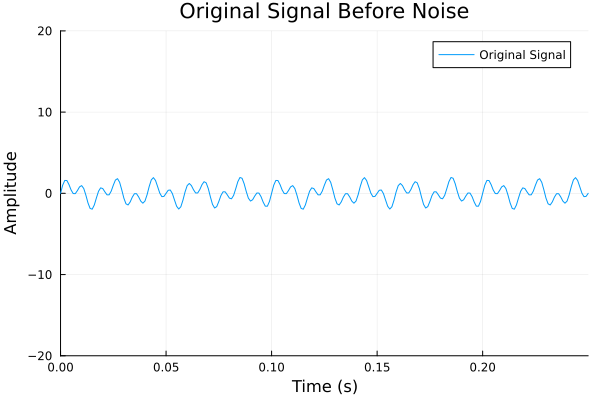

In [114]:
dt = 0.001
t = 0:dt:1
f = sin.(2 * π * 50 * t) .+ sin.(2 * π * 120 * t) # Sum of 2 frequencies
# Plot the original signal (before noise)
plot(t, sin.(2 * π * 50 * t) .+ sin.(2 * π * 120 * t), label="Original Signal", xlabel="Time (s)", ylabel="Amplitude", title="Original Signal Before Noise",ylims=(-20, 20),xlims=(0, 0.25))

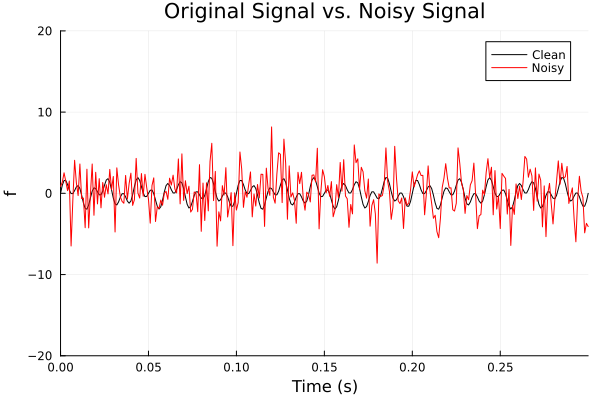

In [115]:
# Add noise to the signal
f = f .+ 2.5 * randn(length(t))
# Plot the original signal and noisy signal
original_signal = sin.(2 * π * 50 * t) .+ sin.(2 * π * 120 * t)
noisy_signal = f 
plot(t, original_signal, label="Clean", xlabel="Time (s)", ylabel="f", title="Original Signal vs. Noisy Signal",color=:black,ylims=(-20, 20),xlims=(0, 0.3))
plot!(t, noisy_signal, label="Noisy", color=:red)

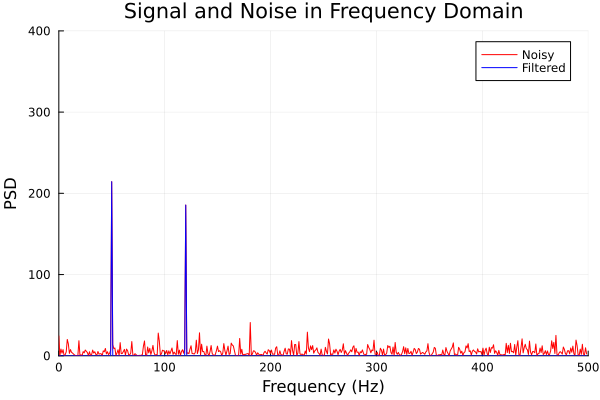

In [116]:
# Compute the Fast Fourier Transform FFT
n = length(t)
fhat = fft(f)                # Compute the fast Fourier transform without specifying length
PSD = abs.(fhat).^2 / n      # Power spectrum (power per frequency)
freq = 1 / (dt * n) * (0:n)  # Create x-axis of frequencies in Hz
L = 1:floor(Int, n/2)        # Only first half (positive frequencies)

threshold = 100  # You can experiment with this value

# Mask for signal and noise based on the threshold
signal_mask = PSD .> threshold  # Logical mask for signal frequencies
noise_mask = PSD .<= threshold  # Logical mask for noise frequencies

# Separate PSD components for signal and noise
PSD_signal = PSD .* signal_mask
PSD_noise = PSD .* noise_mask

# Plot the Power Spectral Density for the signal and noise
plot(freq[L], PSD[L], label="Noisy",  xlabel="Frequency (Hz)", ylabel="PSD", title="Signal and Noise in Frequency Domain", legend=:topright,ylims=(0, 400),xlims=(0, 500),color=:red)
plot!(freq[L], PSD_signal[L], label="Filtered",color=:blue)


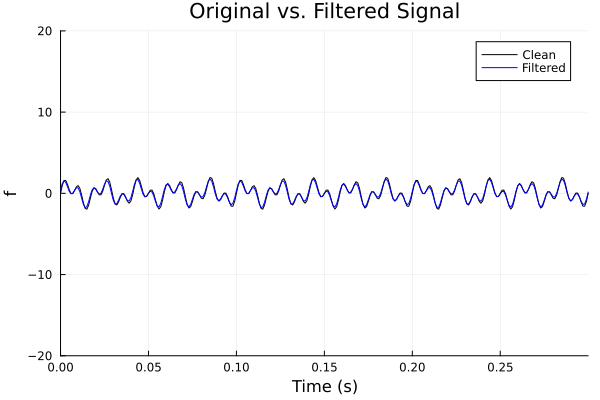

In [117]:
indices = abs.(PSD) .> 100   # Use the magnitude (absolute value) of the PSD for comparison
PSDclean = PSD .* indices    # Zero out all PSD values that don't meet the threshold
fhat_clean = fhat .* indices # Zero out Fourier coefficients
ffilt = ifft(fhat_clean)     # Inverse FFT to get the filtered time-domain signal
#Plot de-noised signal
plot(t, original_signal, label="Clean", xlabel="Time (s)", ylabel="f", title="Original vs. Filtered Signal", ylims=(-20, 20),xlims=(0, 0.3),color=:black)
plot!(t, real(ffilt), label="Filtered", color=:blue)